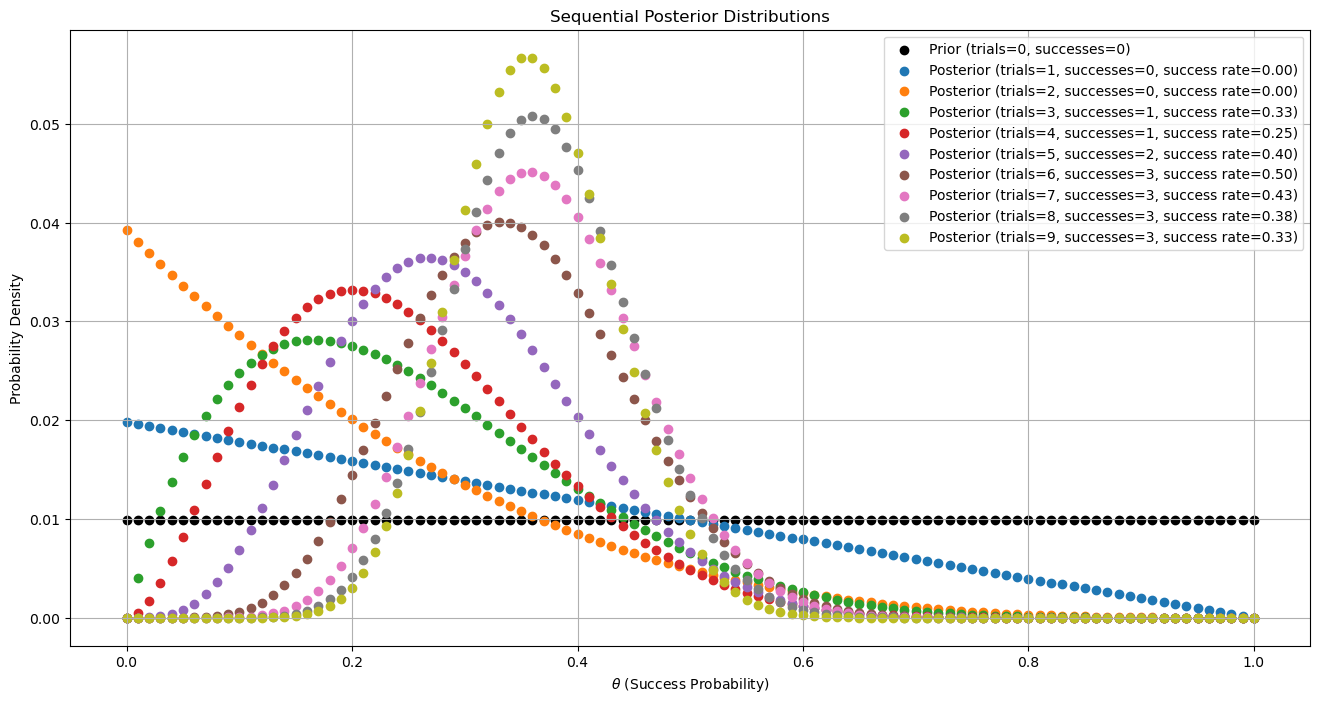

In [1]:
#Q1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

theta_values = np.linspace(0, 1, 101)

prior_distribution = np.ones(101) / 101

data_observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]

total_trials = 0
total_successes = 0

plt.figure(figsize=(16, 8))
plt.scatter(theta_values, prior_distribution, label=f"Prior (trials={total_trials}, successes={total_successes})", color='k')
plt.title("Sequential Posterior Distributions: Heights Sum to 1")

for observation in data_observations:
    total_trials += 1  
    total_successes += observation  

    likelihood = theta_values ** total_successes * (1 - theta_values) ** (total_trials - total_successes)

    posterior_distribution = likelihood * prior_distribution
    posterior_distribution /= posterior_distribution.sum()  

    prior_distribution = posterior_distribution

    plt.scatter(theta_values, posterior_distribution, 
                label=f"Posterior (trials={total_trials}, successes={total_successes}, success rate={total_successes/total_trials:.2f})")

plt.title("Sequential Posterior Distributions")
plt.xlabel(r"$\theta$ (Success Probability)")
plt.ylabel("Probability Density")
plt.legend(loc="upper right")
plt.grid(True)
plt.show("png")


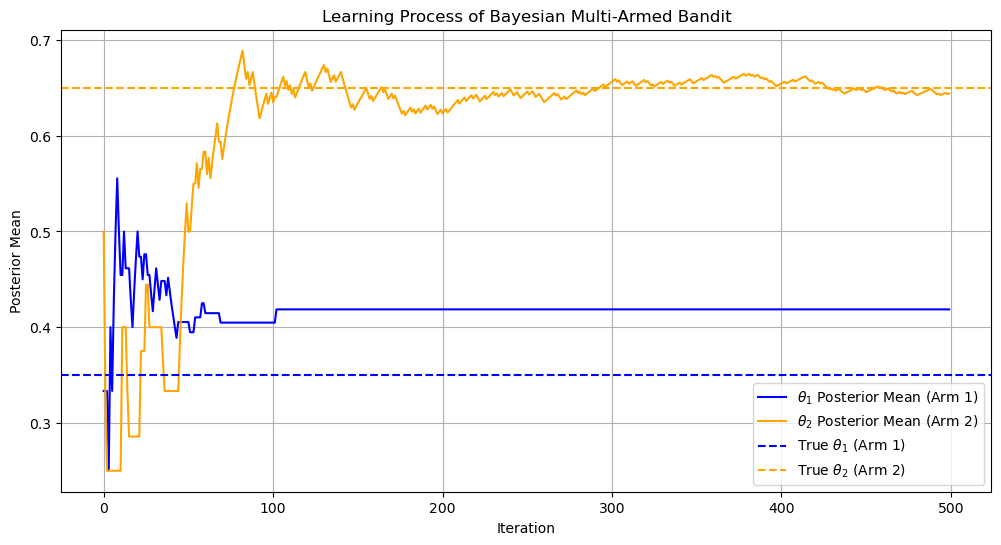

Final Posterior Mean for Arm 1 (Estimated): 0.419
Final Posterior Mean for Arm 2 (Estimated): 0.644
True Success Probability for Arm 1: 0.35
True Success Probability for Arm 2: 0.65


In [2]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set true success probabilities for the two arms
true_success_prob_arm1 = 0.35  # True success probability for Arm 1
true_success_prob_arm2 = 0.65  # True success probability for Arm 2

# Initialize prior parameters for Beta distributions
prior_alpha_arm1, prior_beta_arm1 = 1, 1  # Prior for Arm 1
prior_alpha_arm2, prior_beta_arm2 = 1, 1  # Prior for Arm 2

# Initialize counters for trials and successes
trials_arm1, successes_arm1 = 0, 0  # Counts for Arm 1
trials_arm2, successes_arm2 = 0, 0  # Counts for Arm 2

# Number of iterations
num_iterations = 500
num_samples = 1000  # Number of samples for Monte Carlo estimation

# History of posterior means for plotting
posterior_means_arm1 = []
posterior_means_arm2 = []

# Bayesian Multi-Armed Bandit Algorithm
for iteration in range(num_iterations):
    # Sample from the Beta posteriors for both arms
    samples_arm1 = beta.rvs(prior_alpha_arm1 + successes_arm1, 
                            prior_beta_arm1 + trials_arm1 - successes_arm1, size=num_samples)
    samples_arm2 = beta.rvs(prior_alpha_arm2 + successes_arm2, 
                            prior_beta_arm2 + trials_arm2 - successes_arm2, size=num_samples)
    
    # Estimate the probability that Arm 1's success probability is less than Arm 2's
    prob_arm1_less_than_arm2 = np.mean(samples_arm1 < samples_arm2)
    
    # Decide which arm to pull based on the estimated probability
    if np.random.rand() < prob_arm1_less_than_arm2:
        # Pull Arm 2
        success = np.random.rand() < true_success_prob_arm2
        trials_arm2 += 1
        successes_arm2 += success
    else:
        # Pull Arm 1
        success = np.random.rand() < true_success_prob_arm1
        trials_arm1 += 1
        successes_arm1 += success
    
    # Record the posterior means for each arm
    mean_arm1 = (prior_alpha_arm1 + successes_arm1) / (prior_alpha_arm1 + prior_beta_arm1 + trials_arm1)
    mean_arm2 = (prior_alpha_arm2 + successes_arm2) / (prior_alpha_arm2 + prior_beta_arm2 + trials_arm2)
    posterior_means_arm1.append(mean_arm1)
    posterior_means_arm2.append(mean_arm2)

plt.figure(figsize=(12, 6))
plt.plot(posterior_means_arm1, label=r"$\theta_1$ Posterior Mean (Arm 1)", color="blue")
plt.plot(posterior_means_arm2, label=r"$\theta_2$ Posterior Mean (Arm 2)", color="orange")
plt.axhline(true_success_prob_arm1, color="blue", linestyle="--", label=r"True $\theta_1$ (Arm 1)")
plt.axhline(true_success_prob_arm2, color="orange", linestyle="--", label=r"True $\theta_2$ (Arm 2)")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Learning Process of Bayesian Multi-Armed Bandit")
plt.legend()
plt.grid()
plt.show("png")

print(f"Final Posterior Mean for Arm 1 (Estimated): {posterior_means_arm1[-1]:.3f}")
print(f"Final Posterior Mean for Arm 2 (Estimated): {posterior_means_arm2[-1]:.3f}")
print(f"True Success Probability for Arm 1: {true_success_prob_arm1}")
print(f"True Success Probability for Arm 2: {true_success_prob_arm2}")


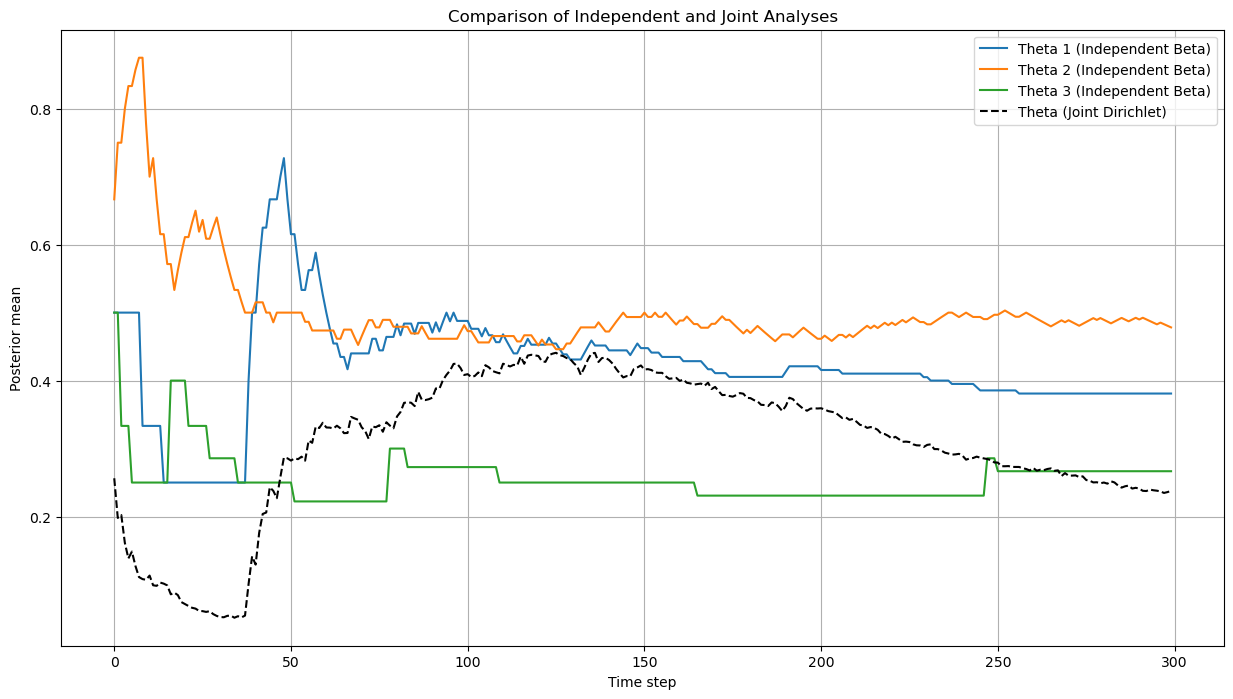

Final posterior mean estimates (Independent Beta-Binomial):
Theta 1: 0.381
Theta 2: 0.478
Theta 3: 0.267

Final posterior mean estimate for Theta (Joint Dirichlet): 0.238

The independent Beta-Binomial analysis is best for unrelated entities, offering simplicity and computational
efficiency, but it lacks the ability to share information across entities. 
The joint Dirichlet-Multinomial analysis is more appropriate for related entities or sparse data, leveraging 
shared information for improved estimates at the cost of added complexity.



In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True success probabilities for three entities
theta_true = [0.45, 0.5, 0.55] 

# Prior parameters for Beta distributions (Independent Analysis)
alpha_prior = [1, 1, 1]  # Alpha parameters for entities
beta_prior = [1, 1, 1]   # Beta parameters for entities

# Counters for successes and trials for each entity
n = [0, 0, 0]  # Total trials for each entity
x = [0, 0, 0]  # Successes for each entity

# Number of iterations
m = 300
num_samples = 1000  # Monte Carlo samples for probability estimation
epsilon = 1e-6      # Small positive constant for Dirichlet stability

# Storage for posterior means
posterior_means_independent = [[] for _ in range(3)]
posterior_means_joint = []  

# Bayesian Multi-Armed Bandit Algorithm
for t in range(m):
    # Independent Beta-Binomial
    # Draw samples from Beta distributions for each entity
    theta_samples = [beta.rvs(alpha_prior[i] + x[i], beta_prior[i] + n[i] - x[i], size=num_samples) for i in range(3)]
    
    # Compute the probability that Entity 1 is the best
    prob_theta1_best = np.mean((theta_samples[0] > theta_samples[1]) & (theta_samples[0] > theta_samples[2]))
    
    # Decide which entity to sample based on probabilities
    if np.random.rand() < prob_theta1_best:
        chosen = 0
    elif np.random.rand() < np.mean(theta_samples[1] > theta_samples[2]):
        chosen = 1
    else:
        chosen = 2

    # Simulate success or failure for the chosen entity
    success = np.random.rand() < theta_true[chosen]
    n[chosen] += 1
    x[chosen] += success

    # Record posterior means for Independent Analysis
    for i in range(3):
        posterior_means_independent[i].append((alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i]))

    # Joint Dirichlet-Multinomial 
    # Compute Dirichlet parameters
    dirichlet_params = [alpha_prior[i] + x[i] + epsilon for i in range(3)]
    dirichlet_posterior = dirichlet.rvs(dirichlet_params, size=num_samples)
    
    # Compute the probability that Entity 1 is the best
    prob_theta1_best_joint = np.mean((dirichlet_posterior[:, 0] > dirichlet_posterior[:, 1]) & 
                                     (dirichlet_posterior[:, 0] > dirichlet_posterior[:, 2]))
    
    # Record joint posterior mean for Entity 1
    posterior_means_joint.append(np.mean(dirichlet_posterior[:, 0]))

# Plot Results 
plt.figure(figsize=(15, 8))

# Plot posterior means for Independent Beta-Binomial Analysis
for i in range(3):
    plt.plot(posterior_means_independent[i], label=f"Theta {i+1} (Independent Beta)")

# Plot posterior mean for Joint Dirichlet-Multinomial Analysis (Entity 1 as an example)
plt.plot(posterior_means_joint, label="Theta (Joint Dirichlet)", linestyle="--", color="black")

# Add labels and legends
plt.xlabel("Time step")
plt.ylabel("Posterior mean")
plt.title("Comparison of Independent and Joint Analyses")
plt.legend()
plt.grid()
plt.show()

# Print final posterior mean estimates
print("Final posterior mean estimates (Independent Beta-Binomial):")
for i in range(3):
    print(f"Theta {i+1}: {(alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i]):.3f}")

print(f"\nFinal posterior mean estimate for Theta (Joint Dirichlet): {posterior_means_joint[-1]:.3f}")

answer_text = """
The independent Beta-Binomial analysis is best for unrelated entities, offering simplicity and computational
efficiency, but it lacks the ability to share information across entities. 
The joint Dirichlet-Multinomial analysis is more appropriate for related entities or sparse data, leveraging 
shared information for improved estimates at the cost of added complexity.
"""
print(answer_text)
